In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
#load data in dataframe
data_train =pd.read_csv("./csv_files/credit score classification/train.csv")
data_test =pd.read_csv("./csv_files/credit score classification/test.csv")


C:\Users\Smriti\AppData\Local\Temp\ipykernel_9580\3432185909.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train =pd.read_csv("./csv_files/credit score classification/train.csv")


In [13]:
#copy the dataframe
train = data_train.copy()
test = data_test.copy()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
train.shape

(100000, 28)

In [16]:
test.shape

(50000, 27)

In [17]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [18]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Data Formatting

##### Train Data

In [19]:
# # age, loans, delayed payments
# train['Age'] = train['Age'].fillna('0').astype(float).astype(int)
# train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').astype(float).astype(int)
# train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').astype(float).astype(int)

In [20]:
# Clean 'Age' column by removing non-numeric characters, filling missing values, and then converting to int
test['Age'] = test['Age'].str.replace(r'\D', '', regex=True)  # Remove non-numeric characters
test['Age'] = test['Age'].fillna('0').astype(float).astype(int)  # Fill missing values, convert to float, then to int

# Clean 'Num_of_Loan' column by removing non-numeric characters, fill missing, and convert to int
test['Num_of_Loan'] = test['Num_of_Loan'].str.replace(r'\D', '', regex=True).fillna('0').astype(int)

# Clean 'Num_of_Delayed_Payment' column similarly
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].str.replace(r'\D', '', regex=True).fillna('0').astype(int)

In [21]:
#annual income
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)


In [22]:
# credit limit
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

In [23]:
# Outstanding Debt
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

In [24]:
#Invested Monthly
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

In [25]:
# Monthly Balance
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

In [26]:
#Credit History Age
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  

train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  object 
 2   Month                      100000 non-null  object 
 3   Name                       90015 non-null   object 
 4   Age                        100000 non-null  object 
 5   SSN                        100000 non-null  object 
 6   Occupation                 100000 non-null  object 
 7   Annual_Income              100000 non-null  float64
 8   Monthly_Inhand_Salary      84998 non-null   float64
 9   Num_Bank_Accounts          100000 non-null  int64  
 10  Num_Credit_Card            100000 non-null  int64  
 11  Interest_Rate              100000 non-null  int64  
 12  Num_of_Loan                100000 non-null  object 
 13  Type_of_Loan               885

### Duplicates

In [28]:
duplicates = train[train.duplicated()]
num_duplicates = duplicates.shape[0]

if num_duplicates == 0:
    print("There are no duplicates")
else:
    print("There are", num_duplicates, "duplicates.")

There are no duplicates


### Data Scaling

In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01
Num_Credit_Inquiries,98035.0,27.754251,1.931773e+02,0.000000,3.000000,6.000000,9.000000,2.597000e+03
Outstanding_Debt,100000.0,1426.220376,1.155129e+03,0.230000,566.072500,1166.155000,1945.962500,4.998070e+03
Credit_Utilization_Ratio,100000.0,32.285173,5.116875e+00,20.000000,28.052567,32.305784,36.496663,5.000000e+01


In [31]:
# removing top outliers
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 
                                'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85806.0,120.486003,690.067511,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,85806.0,49378.620726,36478.390299,7005.930000,19294.460000,36780.030000,70825.760000,166837.640000
Monthly_Inhand_Salary,72894.0,4105.781241,3036.319177,303.645417,1623.778333,3069.091667,5899.970000,14131.123333
Num_Bank_Accounts,85806.0,5.372759,2.585031,-1.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,85806.0,5.779048,5.727016,0.000000,4.000000,5.000000,7.000000,171.000000
Interest_Rate,85806.0,14.551174,8.824173,1.000000,7.000000,13.000000,20.000000,128.000000
Num_of_Loan,85806.0,7.318381,18.881665,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,85806.0,21.033483,14.786223,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,85806.0,12.348321,6.845002,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,85806.0,10.189597,6.867078,-6.490000,4.990000,9.280000,14.710000,36.970000


### Filtering Values

In [20]:
train = train[train['Payment_Behaviour'] != '!@9#%8']

In [21]:
train = train[train['Occupation'] != '_______']
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [22]:
train = train[train['Credit_Mix'] != '_']
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


In [23]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    train = train[train[column] >= 0]

In [24]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 
                   'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

train.drop(columns=columns_to_drop, inplace=True)

In [26]:
total_missing_values = train.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values")
else:
    print("Total missing values:", total_missing_values)

There are no missing values


In [27]:
train.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

### Feature Engineering

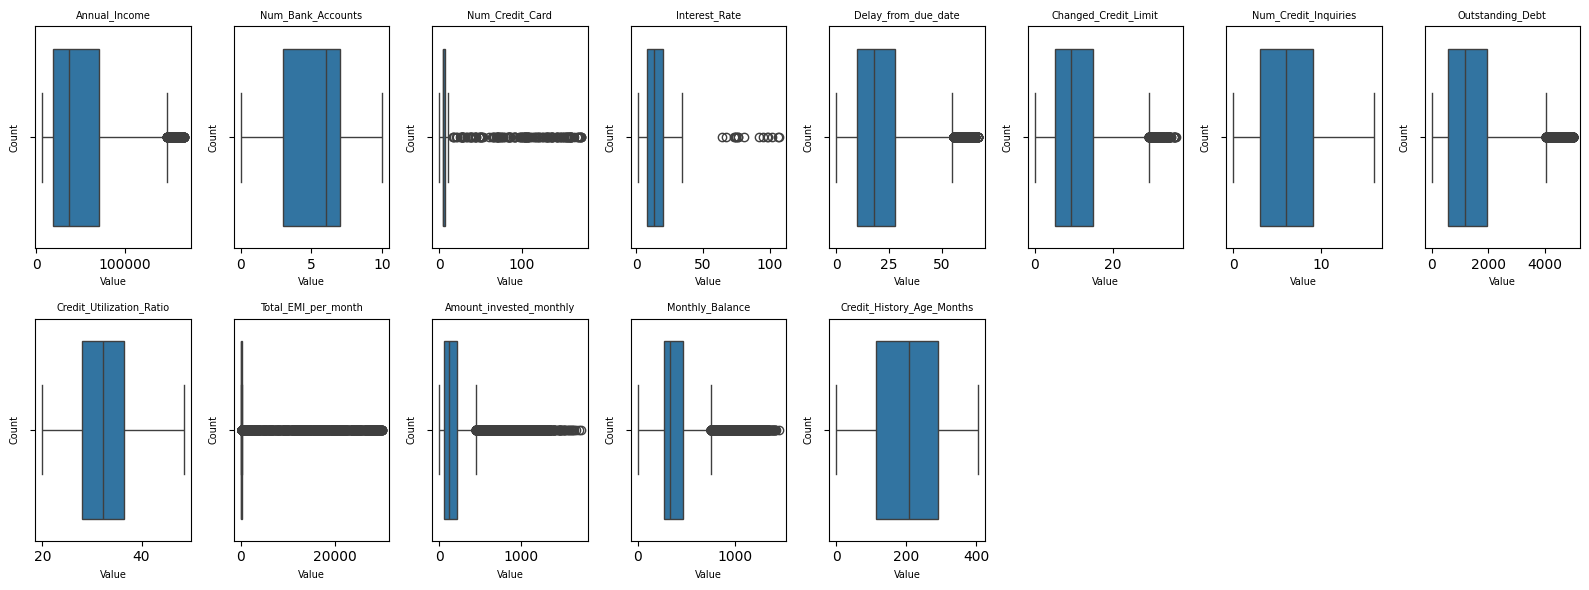

In [28]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [29]:
# Scaling
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

### Encoding

##### Label Encoding

In [31]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

In [32]:
label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

##### Ordinal Encoding

In [33]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

In [34]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])

In [35]:
# dropping unencoded columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

#### Adding New Features

In [36]:
# Total number of accounts (Bank Accounts + Credit Cards)

train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Total outstanding debt per account

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Ratio of outstanding debt to annual income

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Total number of delayed payments per account

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Total monthly expenses (EMI + Monthly Investments) 

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']

##### Mutual Information Score

In [37]:
categorical_columns = train.select_dtypes(include=['object']).columns

data_encoded = train.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.006940515033107886
Feature 'Annual_Income': Mutual Information Score = 0.42806160531608284
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.05802152349902645
Feature 'Num_Credit_Card': Mutual Information Score = 0.0701316842708628
Feature 'Interest_Rate': Mutual Information Score = 0.09834610230643981
Feature 'Num_of_Loan': Mutual Information Score = 0.01790655895194937
Feature 'Delay_from_due_date': Mutual Information Score = 0.06649383862061775
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.047214868465399906
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10650350879544712
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.033812787960251445
Feature 'Outstanding_Debt': Mutual Information Score = 0.4306156351049846
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.06992112489393953
Feature 'Total_E

In [39]:
columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
train.drop(columns=columns_to_drop, inplace=True)

### EDA

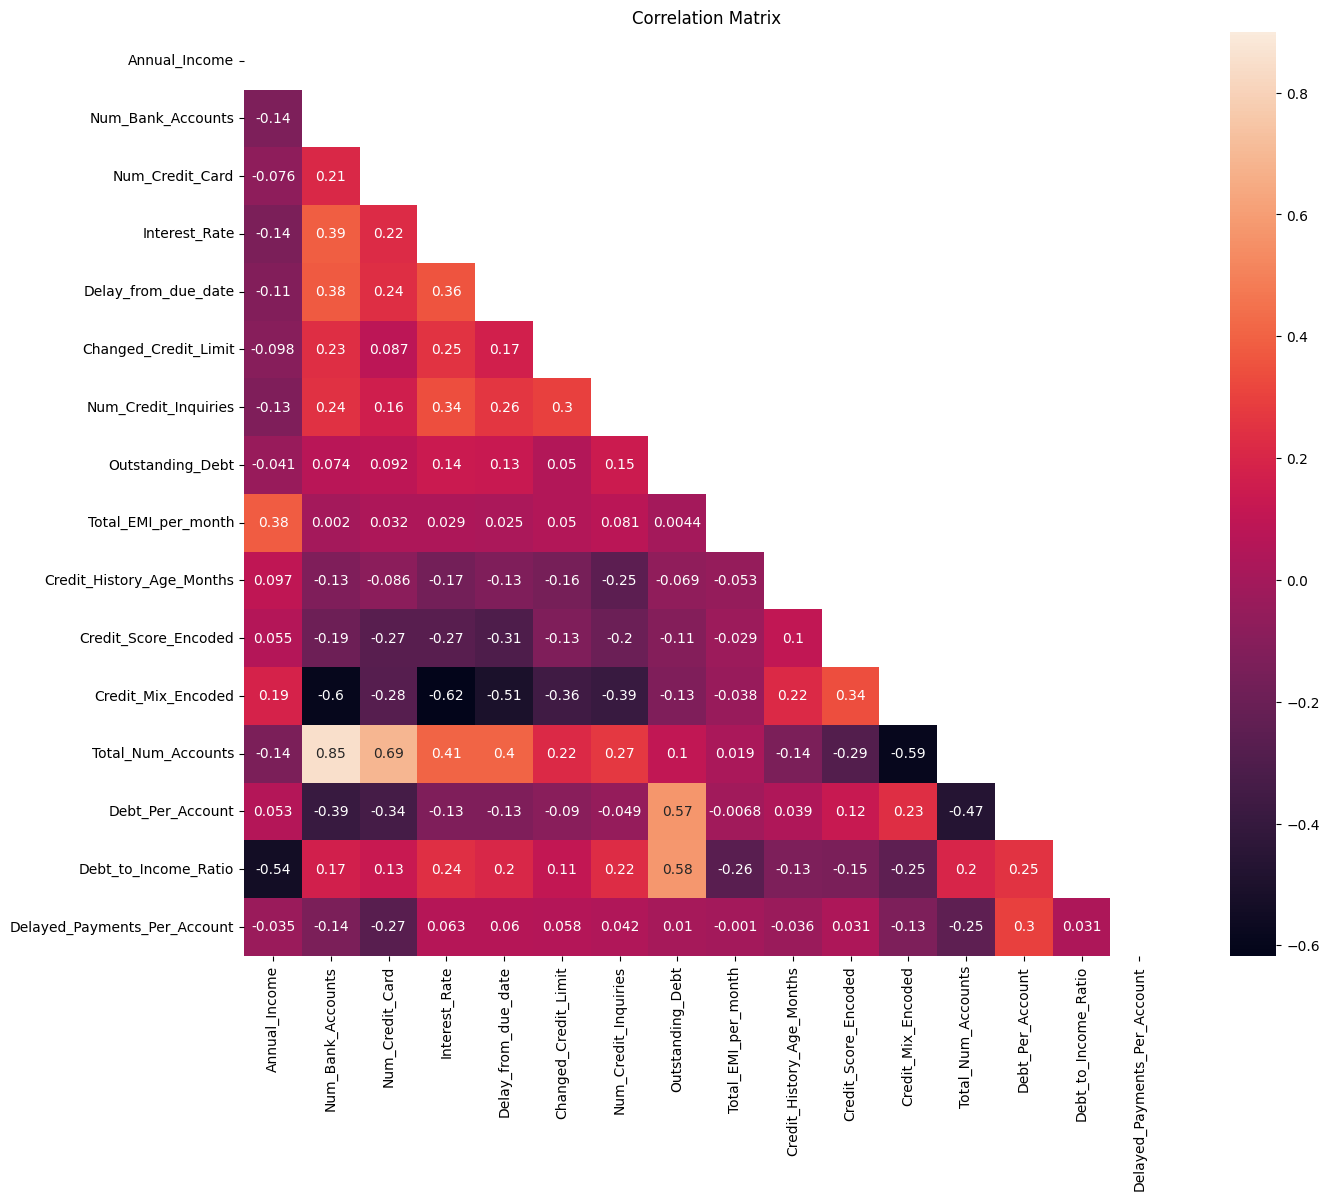

In [40]:
# Calculate correlation Matrix
corr = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

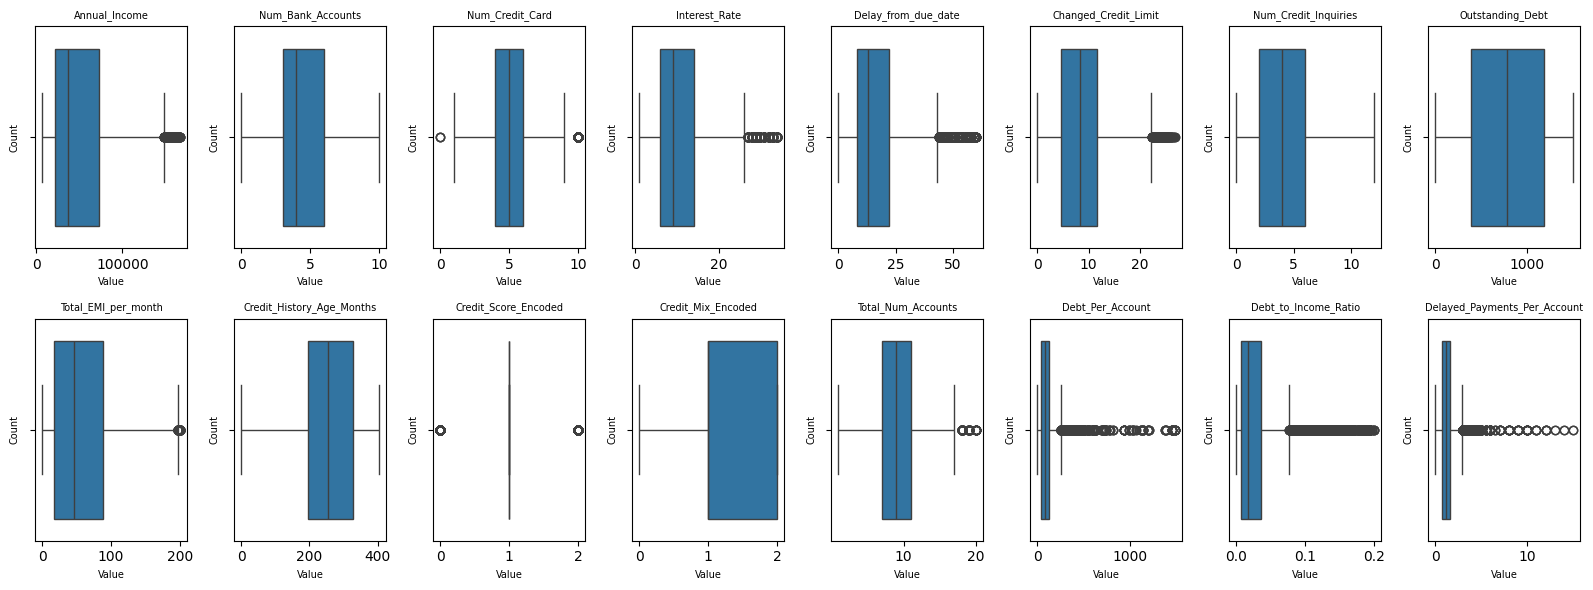

In [41]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Model

In [42]:
y = train['Credit_Score_Encoded']

X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts', 
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [47]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [95]:
y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.8094852703140175


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logistic_classifier = LogisticRegression(C=0.2)
logistic_classifier.fit(X_train, y_train)


c:\Users\Smriti\.conda\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.2)

In [96]:
y_pred = logistic_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(classification_report(y_test,y_pred))
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)


[[   0  872   29]
 [   0 3706  104]
 [   0 1250  217]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       901
         1.0       0.64      0.97      0.77      3810
         2.0       0.62      0.15      0.24      1467

    accuracy                           0.63      6178
   macro avg       0.42      0.37      0.34      6178
weighted avg       0.54      0.63      0.53      6178



c:\Users\Smriti\.conda\envs\workshop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Smriti\.conda\envs\workshop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Smriti\.conda\envs\workshop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6349951440595663


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
decision_classifier = DecisionTreeClassifier()
decision_classifier = decision_classifier.fit(X_train,y_train)
y_pred = decision_classifier.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred))
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

              precision    recall  f1-score   support

         0.0       0.64      0.61      0.62       901
         1.0       0.81      0.82      0.81      3810
         2.0       0.68      0.68      0.68      1467

    accuracy                           0.75      6178
   macro avg       0.71      0.70      0.71      6178
weighted avg       0.75      0.75      0.75      6178

Accuracy: 0.7547750080932341


### Accuracy Comparison Chart

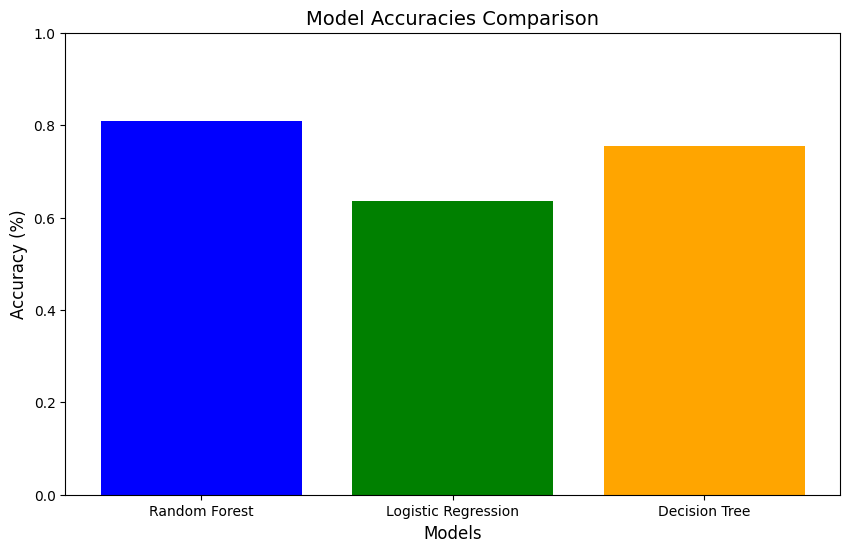

In [100]:
# Define models and their respective accuracies
models = ['Random Forest', 'Logistic Regression', 'Decision Tree']
accuracies = [rf_accuracy, lr_accuracy, dt_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add titles and labels
plt.title('Model Accuracies Comparison', fontsize=14)
plt.ylim(0.0, 1.0)  # Adjusted to allow full range of accuracy
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Display the chart
plt.show()

### Test data

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  int32  
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  int32  
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

### Data Formatting

In [66]:
# Clean non-numeric characters from the columns before converting them
# For 'Age', 'Num_of_Loan', and 'Num_of_Delayed_Payment'

# Convert 'Age' to float, fill missing values, and then convert to int
test['Age'] = test['Age'].fillna('0').astype(float).astype(int)

# Clean 'Num_of_Loan' column by removing non-numeric characters, fill missing, and convert to int
test['Num_of_Loan'] = test['Num_of_Loan'].replace(r'\D', '', regex=True)
test['Num_of_Loan'] = test['Num_of_Loan'].fillna('0').astype(float).astype(int)

# Clean 'Num_of_Delayed_Payment' column by removing non-numeric characters, fill missing, and convert to int
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].replace(r'\D', '', regex=True)
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].fillna('0').astype(float).astype(int)



In [67]:
#annual income
test['Annual_Income'] = test['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
test['Annual_Income'] = test['Annual_Income'].astype(float)


In [68]:
# credit limit
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].replace('_', np.nan)
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors='coerce')
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].fillna(0)

In [69]:
# Outstanding Debt
test['Outstanding_Debt'] = test['Outstanding_Debt'].astype(str)
test['Outstanding_Debt'] = test['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
test['Outstanding_Debt'] = pd.to_numeric(test['Outstanding_Debt'], errors='coerce')
test['Outstanding_Debt'] = test['Outstanding_Debt'].fillna(0)

In [70]:
#Invested Monthly
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].astype(str)
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].replace('', '0')
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
test['Amount_invested_monthly'] = pd.to_numeric(test['Amount_invested_monthly'], errors='coerce')
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].fillna(0)

In [72]:
# Monthly Balance
test['Monthly_Balance'] = test['Monthly_Balance'].astype(str)
test['Monthly_Balance'] = test['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
test['Monthly_Balance'] = pd.to_numeric(test['Monthly_Balance'], errors='coerce')
test['Monthly_Balance'] = test['Monthly_Balance'].fillna(0)

In [73]:
#Credit History Age

test['Credit_History_Age_Months'] = test['Credit_History_Age'].apply(parse_years_and_months)

### Duplicates

In [74]:
duplicates = test[test.duplicated()]
num_duplicates = duplicates.shape[0]

if num_duplicates == 0:
    print("There are no duplicates")
else:
    print("There are", num_duplicates, "duplicates.")

There are no duplicates


### Data Scaling

In [75]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,118.994420,6.781333e+02,14.000000,25.000000,34.000000,43.000000,8.688000e+03
Annual_Income,50000.0,166334.204997,1.351965e+06,7005.930000,19453.327500,37577.820000,72817.020000,2.413726e+07
Monthly_Inhand_Salary,42502.0,4182.004291,3.174109e+03,303.645417,1625.188333,3086.305000,5934.189094,1.520463e+04
Num_Bank_Accounts,50000.0,16.838260,1.163968e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,50000.0,22.921480,1.293148e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,50000.0,68.772640,4.516024e+02,1.000000,8.000000,13.000000,20.000000,5.799000e+03
Num_of_Loan,50000.0,11.299360,6.548350e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,50000.0,21.052640,1.486040e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,50000.0,28.747880,2.137640e+02,0.000000,8.000000,13.000000,18.000000,4.399000e+03
Changed_Credit_Limit,50000.0,10.155105,6.872745e+00,-6.450000,4.980000,9.250000,14.600000,3.665000e+01


In [76]:
# removing top outliers
selected_columns_test = test[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

percentile_threshold = 0.98
percentiles = selected_columns_test.quantile(percentile_threshold)

for column in selected_columns_test.columns:
    test = test[test[column] <= percentiles[column]]

In [77]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,42990.0,119.457223,681.020320,14.000000,25.000000,34.000000,43.000000,8688.000000
Annual_Income,42990.0,49291.374298,36436.332756,7005.930000,19294.460000,36729.930000,70674.600000,166837.640000
Monthly_Inhand_Salary,36533.0,4079.888235,3018.247803,303.645417,1619.540833,3057.030833,5851.236667,14131.123333
Num_Bank_Accounts,42990.0,5.368155,2.586637,-1.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,42990.0,5.954059,8.171056,0.000000,4.000000,5.000000,7.000000,226.000000
Interest_Rate,42990.0,14.541289,8.713509,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,42990.0,7.324145,18.894374,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,42990.0,21.035473,14.767209,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,42990.0,12.385252,6.843531,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,42990.0,10.168439,6.871317,-6.450000,4.990000,9.270000,14.630000,36.650000


### Filtering and Handling Missing Values

In [78]:
test = test[test['Payment_Behaviour'] != '!@9#%8']


In [79]:
test = test[test['Occupation'] != '_______']
print(test['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [80]:
test = test[test['Credit_Mix'] != '_']
print(test['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


In [82]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    test = test[test[column] >=0]

In [83]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

test.drop(columns=columns_to_drop, inplace=True)

In [84]:
total_missing_values = test.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values")
else:
    print("Total missing values:", total_missing_values)

There are no missing values


### Feature Engineering

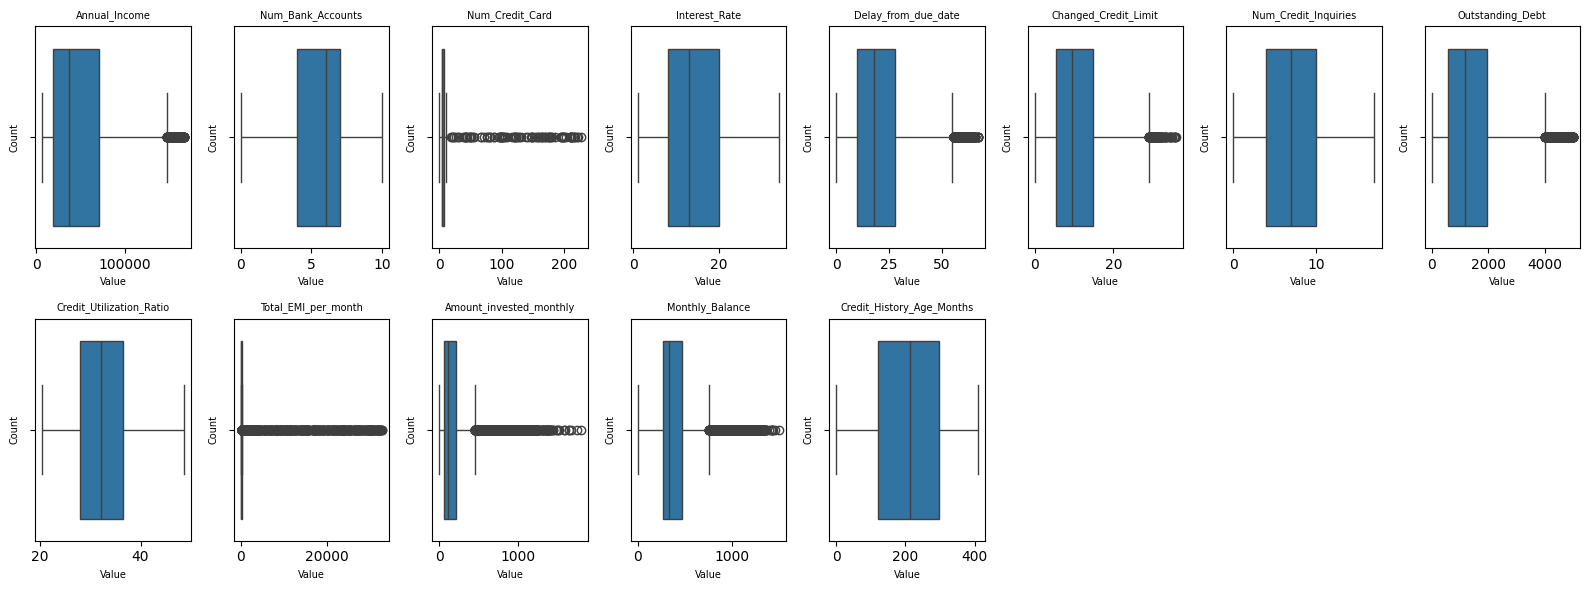

In [85]:
numeric_columns = test.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=test[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [86]:
# Scaling
test = test[test['Age'] < 60]
test = test[test['Num_Credit_Card'] <= 10]
test = test[test['Interest_Rate'] <= 50]
test = test[test['Num_of_Loan'] <= 12]
test = test[test['Num_Bank_Accounts'] <= 10]
test = test[test['Delay_from_due_date'] <= 60]
test = test[test['Changed_Credit_Limit'] <= 30]
test = test[test['Num_Credit_Inquiries'] <= 12]
test = test[test['Total_EMI_per_month'] <= 200]
test = test[test['Outstanding_Debt'] <= 1500]

### Encoding

##### Label Encoding

In [88]:
label_encoder = LabelEncoder()
test['Occupation_Encoded'] = label_encoder.fit_transform(test['Occupation'])

##### Ordinal Encoding

In [89]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

test['Credit_Mix_Encoded'] = encoder.fit_transform(test[['Credit_Mix']])

In [90]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

test['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(test[['Payment_Behaviour']])

In [91]:
# dropping unencoded columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation']
test.drop(columns=columns_to_drop, inplace=True)

#### Adding New Features


In [92]:
# Total number of accounts (Bank Accounts + Credit Cards)

test['Total_Num_Accounts'] = test['Num_Bank_Accounts'] + test['Num_Credit_Card']

# Total outstanding debt per account

test['Debt_Per_Account'] = test['Outstanding_Debt'] / test['Total_Num_Accounts']

# Ratio of outstanding debt to annual income

test['Debt_to_Income_Ratio'] = test['Outstanding_Debt'] / test['Annual_Income']

# Total number of delayed payments per account

test['Delayed_Payments_Per_Account'] = test['Num_of_Delayed_Payment'] / test['Total_Num_Accounts']

# Total monthly expenses (EMI + Monthly Investments) 

test['Total_Monthly_Expenses'] = test['Total_EMI_per_month'] + test['Amount_invested_monthly']

##### Mutual Information Score

In [93]:
columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
test.drop(columns=columns_to_drop, inplace=True)

### EDA

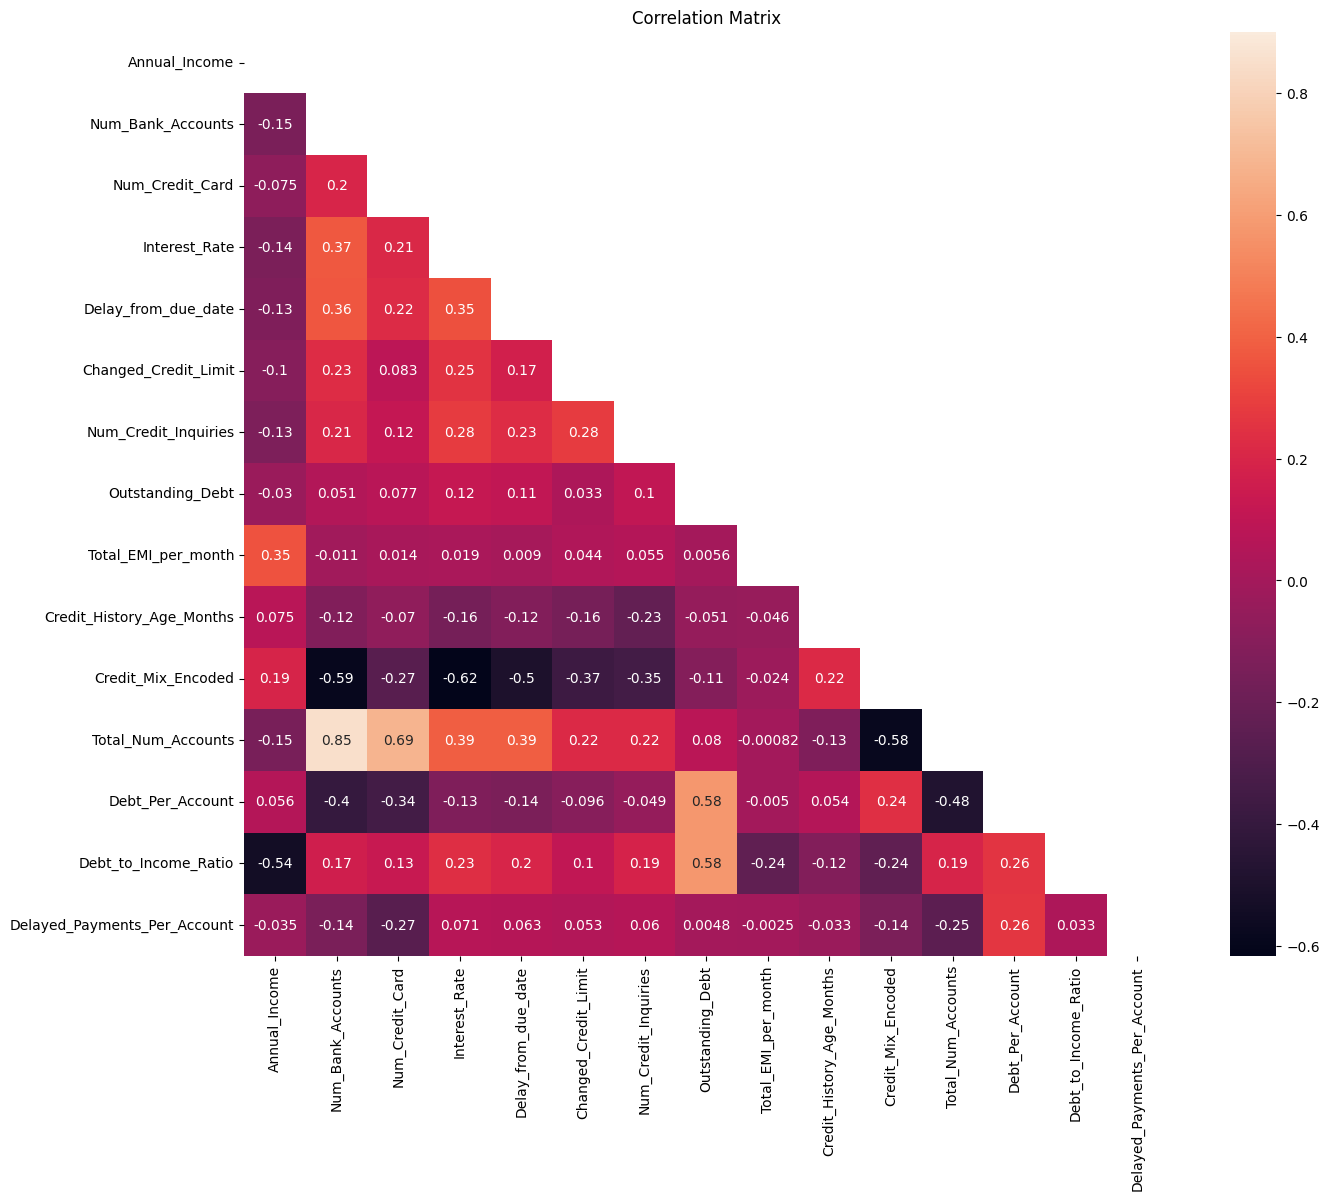

In [94]:
# Calculate correlation Matrix
corr = test.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Performing Predictions on Test Data

In [101]:
# Make predictions on the test data using Random Forest model as it produced highest accuracy
y_pred_test = rf_classifier.predict(test)

In [103]:
#Add predictions to the test dataframe
test['Predicted_Credit_Scores'] = y_pred_test

# Save only the predictions if 'ID' does not exist
test[['Predicted_Credit_Scores']].to_csv('Test_Predictions_Crdit_Score.csv', index=False)

# Display the first few rows of predictions
test[['Predicted_Credit_Scores']].head(8)

,Predicted_Credit_Scores
1,2.0
3,2.0
5,2.0
12,1.0
14,1.0
17,1.0
19,1.0
20,2.0


In [105]:
test.shape

(14802, 18)

In [106]:
train.shape

(30890, 18)